# Task 2) Bungee Jump

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp

plt.style.use('../report.mplstyle')

# Solving Differential Equations using Difference Equations (Euler's Method)

## Part 1) Euler solution to the non linear oscillator (pendulum)

The aims of this task are to write the differential equation into difference equations then using these difference equations write python functions that implement them and solve by stepping through the functions one value at a time and updating all values and using the new values to calculate the next value.
Finally it will be useful to plot the results for $\theta$ and $\omega$ against time.

### Step 1) Write the differential equation into difference equations
Starting eith the two differential equations for the pendulum as given below:
$$\frac{d\theta}{dt}=\omega~ ; \quad \frac{d\omega}{dt}=-\frac{g}{l}\sin{\theta}.$$
To form difference equations with some dependence on eachother it is first necessary to take the time derivative of the first equation and substitute in the second equation to get:

$$\frac{d^2\theta}{dt^2} + \frac{g}{l}\sin{\theta} = 0$$
This with some rearrangement can be written as:
$$\frac{d^2\theta}{dt^2} = -\frac{g}{l}\sin{\theta}$$

And from the equations given we have $$\frac{d\theta}{dt}=\omega$$ and $$\frac{d\omega}{dt}=-\frac{g}{l}\sin{\theta}$$

These are what will be turned into difference equations as shown below.
Where $$dx$$ can be written as $$\Delta x$$ or alternatively $$x_{i+1}-x_i$$
This will be used throughout the rest of task to write the difference equations.
Starting with $$\frac{d\theta}{dt}=\omega$$

we have $$\frac{\theta_{i+1}-\theta_i}{t_{i+1}-t_i}=\omega_i$$

and can finallly be written as $$\theta_{i+1}=\theta_i + \omega_i\Delta t$$

Now for $$\frac{d\omega}{dt}=-\frac{g}{l}\sin{\theta}$$

we have $$\frac{\omega_{i+1}-\omega_i}{t_{i+1}-t_i}=-\frac{g}{l}\sin{\theta_i}$$

and can finallly be written as $$\omega_{i+1}=\omega_i - \frac{g}{l}\sin{\theta_i}\Delta t$$

Giving the two difference equations to be used in the python functions as:
$$\theta_{i+1}=\theta_i + \omega_i\Delta t$$
$$\omega_{i+1}=\omega_i - \frac{g}{l}\sin{\theta_i}\Delta t$$



### Step 2) Turning the differnece equations into python functions
In this part the difference equations for $\theta$ and $\omega$ are turned into python functions. The functions take the current value of $\theta$ and $\omega$ and return the next value of $\theta$ and $\omega$.

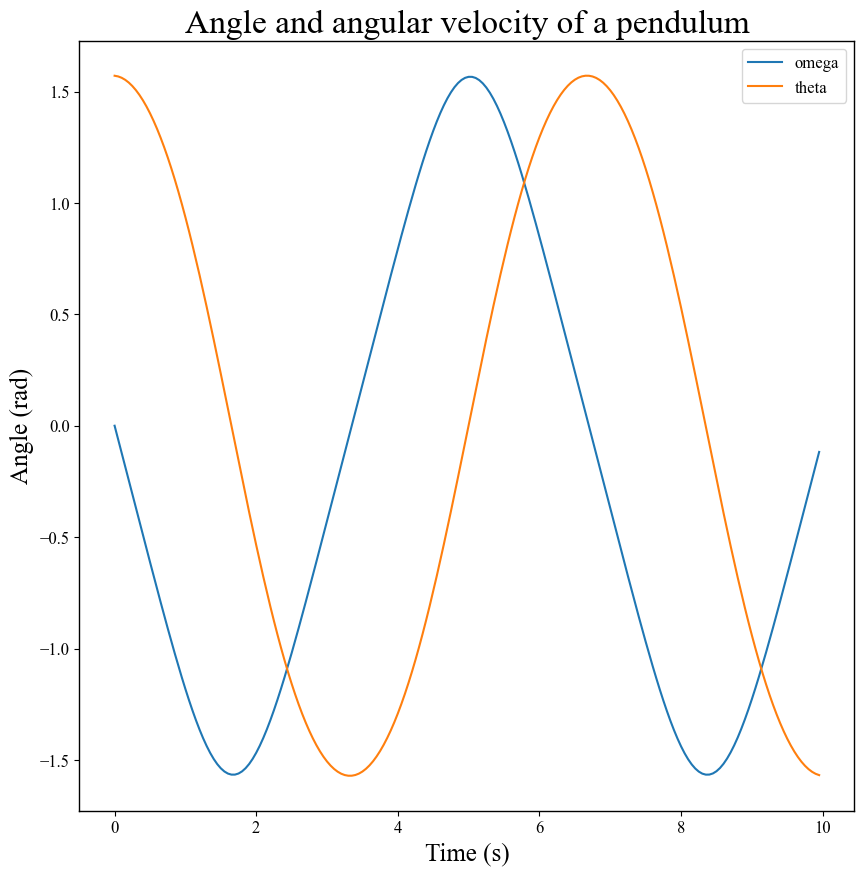

In [10]:
TIMESTEP = 0.05 #Time step for the simulation

def thetafunc(om_1, th_1, dt = TIMESTEP):
    """Defines the function for the theta equation.
    
    Arguments:
        om_1: angular velocity at time t_1
        dt: time step
        th_1: angle at time t_1
    """
    thetai = om_1*dt + th_1
    return thetai

def omfunc(om_1, th_1, params = (9.81,8),dt = TIMESTEP):
    """Defines the function for the angular velocity equation.

    Arguments:
        om_1: angular velocity at time t_1
        dt: time step
        th_1: angle at time t_1
        params: vector of parameters:
        g = gravity
        l = length of pendulum
    """
    g,l = params

    omi = om_1 - g/l*np.sin(th_1)*dt
    return omi

timepoint = np.arange(0, 10, TIMESTEP)
om = np.full_like(timepoint, 0)
theta = np.full_like(timepoint, 0)

for i in np.arange(1, len(timepoint)):

    theta[0] = np.pi/2  #Set initial conditions
    om[0] = 0

    om[i] = omfunc(om[i-1], theta[i-1]) #Calculate next step with the previous step values for the theta and omega functions
    theta[i] = thetafunc(om[i], theta[i-1])

plt.figure(figsize = (10, 10))
plt.plot(timepoint, om,label = "omega")
plt.plot(timepoint, theta, label = "theta")
plt.xlabel("Time (s)")
plt.ylabel("Angle (rad)")
plt.title("Angle and angular velocity of a pendulum")
plt.legend()
plt.show()


### Step 3) Investigating my solution

For this part the parameters passed into the functions are givens some specified values as given in the lab script and i am required to investigate the behaviour of the solution for different values of the initial parameters $\theta_0$, $\omega_0$, the length $l$ and the time step $\Delta t$.

The first set of parameters to be investigated are $\theta_0=\pi/8$, $\omega_0=0$ and $l=1$

This is repeated for some other arbitrary values of $\theta_0$, $\omega_0$ and $l$

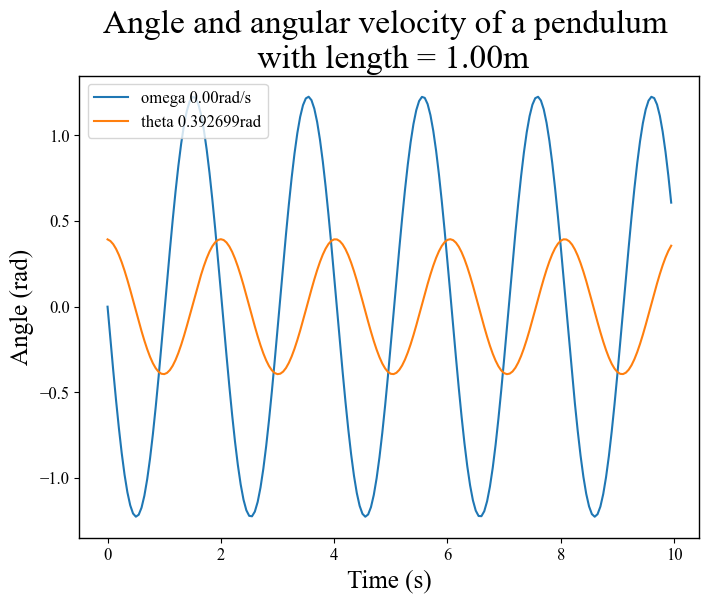

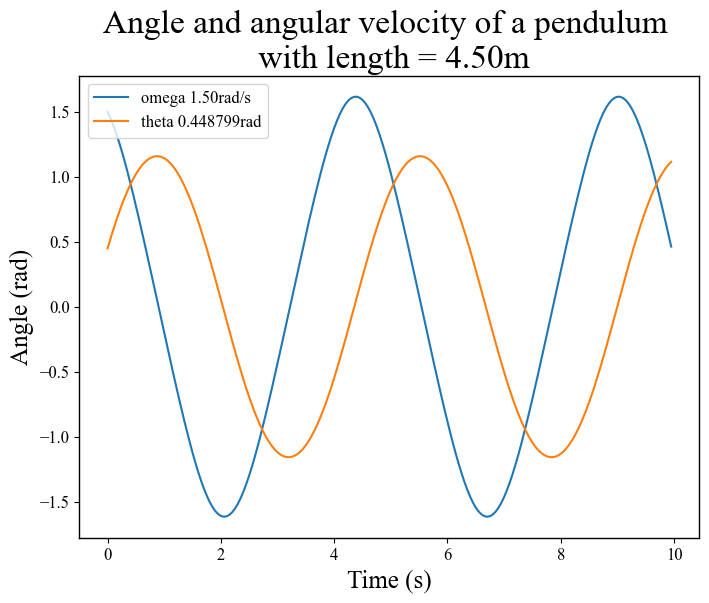

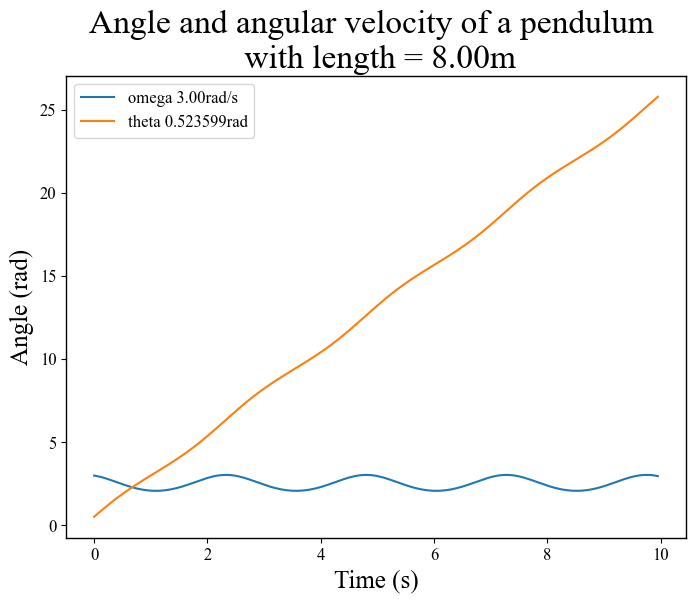

In [3]:
# varying values of theta_0, omega_0 and length_0
for j in range(0, 3):
    theta_0 = [np.pi/8,np.pi/7,np.pi/6, np.pi/5] #array of initial angles
    om_0 = np.linspace(0,3,3)
    length_0 = np.linspace(1, 8, 3)



    for i in np.arange(1, len(timepoint)):  
        theta[0] = theta_0[j] #Set initial conditions
        om[0] = om_0[j]
        g = 9.81
        om[i] = omfunc(om[i-1], theta[i-1],params = (g,length_0[j])) #Calculate next step with the previous step values for the theta and omega functions
        theta[i] = thetafunc(om[i], theta[i-1])

    plt.figure(figsize = (8,6))
    plt.plot(timepoint, om,label = f"omega {om_0[j]:.2f}rad/s")
    plt.plot(timepoint, theta, label = f"theta {theta_0[j]:2g}rad")
    plt.xlabel("Time (s)")
    plt.ylabel("Angle (rad)")
    plt.title(f"Angle and angular velocity of a pendulum \n with length = {length_0[j]:.2f}m")
    plt.legend(loc = "upper left")
    plt.show()



Now the time step $\Delta t$ is varied and the effect on the solution is investigated.

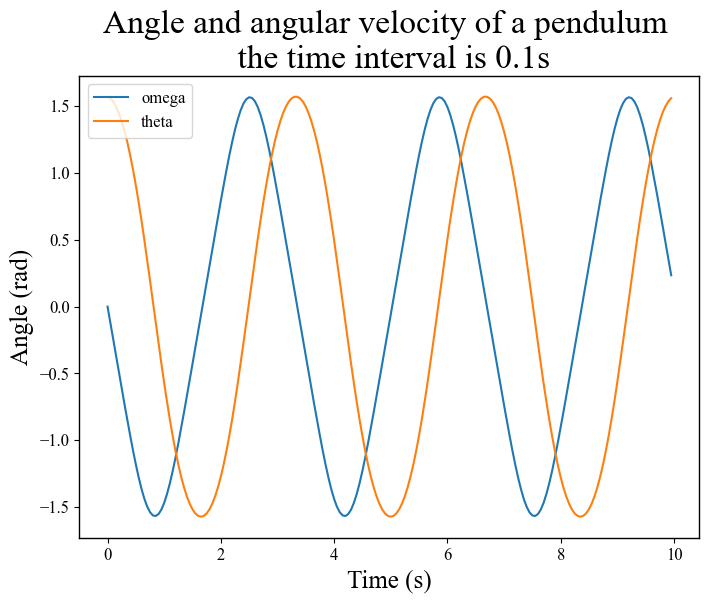

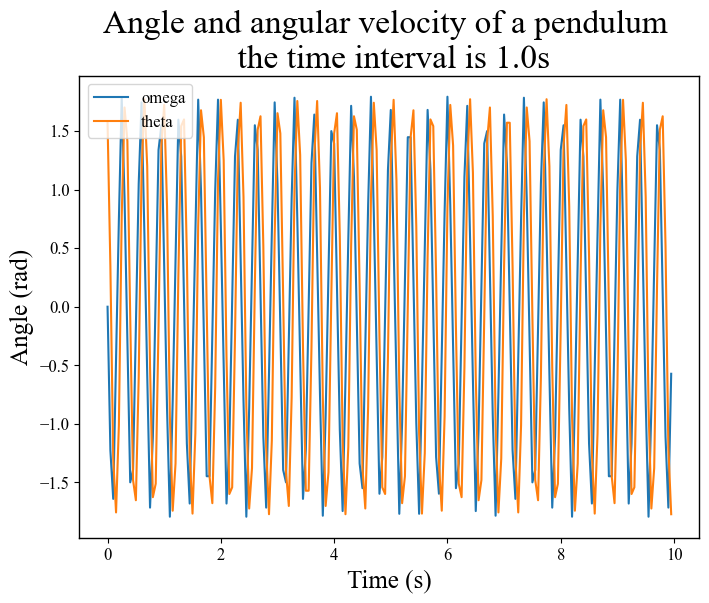

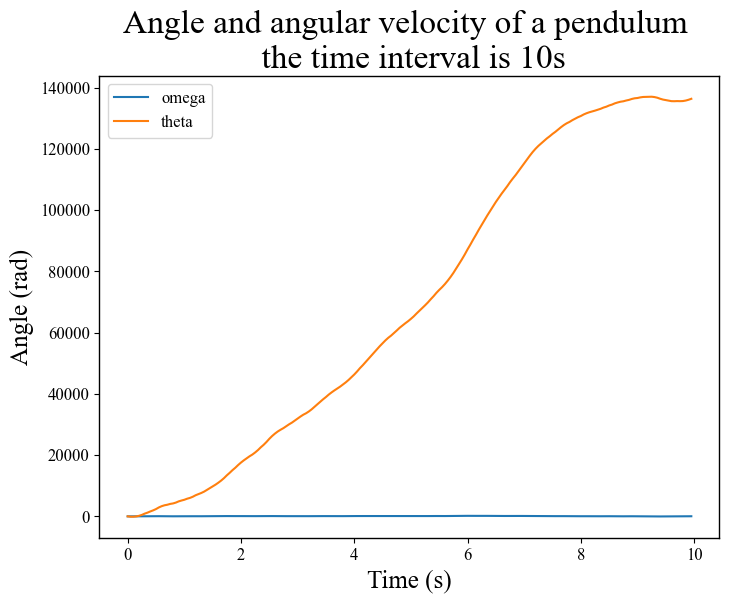

In [4]:

for j in range(0, 3):
    timestep = [0.1,1.0,10]


    for i in np.arange(1, len(timepoint)):  
        theta[0] = np.pi/2  #Set initial conditions
        om[0] = 0

        om[i] = omfunc(om[i-1], theta[i-1],dt = timestep[j]) #Calculate next step with the previous step values for the theta and omega functions
        theta[i] = thetafunc(om[i], theta[i-1],dt = timestep[j])

    plt.figure(figsize = (8,6))
    plt.plot(timepoint, om,label = "omega")
    plt.plot(timepoint, theta, label = "theta")
    plt.xlabel("Time (s)")
    plt.ylabel("Angle (rad)")
    plt.title(f"Angle and angular velocity of a pendulum \n the time interval is {timestep[j]}s")
    plt.legend(loc = "upper left")
    plt.show()


The cell below loads the code from the labscript for the solve_ivp solution to the differential equation this is need to compare to my solution.

In [5]:
#Probably already did this...
import numpy as np

def part2_pend_ode(t, coords):
    "Function defining the pendulum ODE.  Signature as specified in scipy.integrate"
    Q, W = coords #< tuple unpacking.  
    # Here I use Q and W as theta and omega, respectively.  
    # Single-letter variable names are fine in small functions, but be more careful if you have big blocks (>10 lines) of code
    
    g = 9.81
    l = 1
    
    dQ_dt = W
    dW_dt = -g/l * np.sin(Q)
    return [dQ_dt,dW_dt]

#CHECK: If my pendulum is at positive displacement and at rest it will accelerate (dW/dt) in a -ive direction
CHECK_START1 = (0.1,0.0)
print(part2_pend_ode(0, CHECK_START1), "should be [0, <0]?")

#CHECK: If my pedulum is at zero displacement but moving in a positive direction the change in angle (dQ/dt) will be positive.
CHECK_START2 = (0.0,0.1)
print(part2_pend_ode(0, CHECK_START2), "should be [>0, 0]?")


from scipy.integrate import solve_ivp

TIME_RANGE = [0,10]

THETA_START = np.pi/2
OMEGA_START = 0

soln = solve_ivp(part2_pend_ode, TIME_RANGE, [THETA_START, OMEGA_START], max_step = 0.05)

#Can check everything came out ok before we try to use the solution
#print(soln)

soln_times =soln.t
soln_theta, soln_omega = soln.y

#Normalise the solution to plot both on the same axis
soln_theta /= np.max(soln_theta)
soln_omega /= np.max(soln_omega)


[0.0, -0.9793658173053843] should be [0, <0]?
[0.1, -0.0] should be [>0, 0]?


### Comparing the Euler solution to the solve_ivp solution

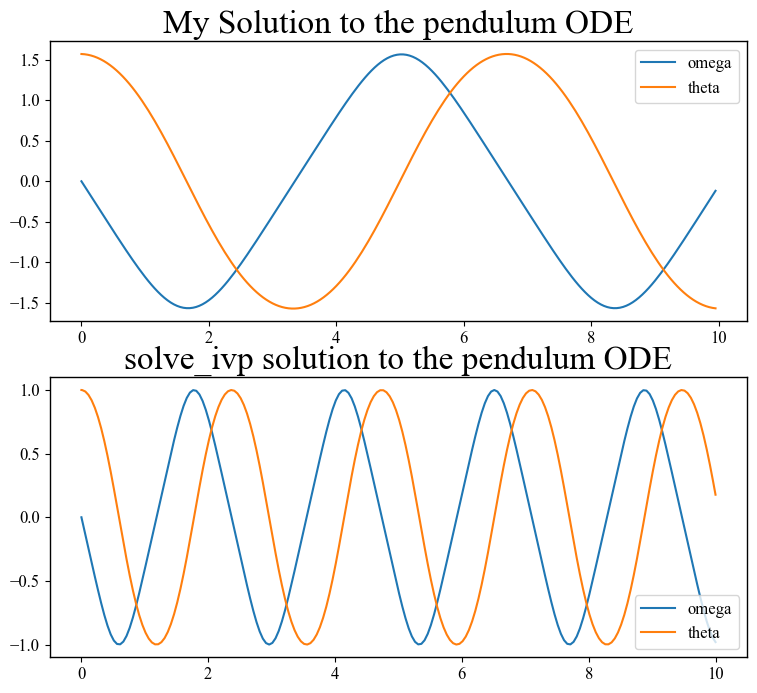

In [6]:


for i in np.arange(1, len(timepoint)):

    theta[0] = np.pi/2  #Set initial conditions
    om[0] = 0

    om[i] = omfunc(om[i-1], theta[i-1]) #Calculate next step with the previous step values for the theta and omega functions
    theta[i] = thetafunc(om[i], theta[i-1])



plt.figure(figsize = (9,8))
plt.subplot(2,1,1)
plt.title("My Solution to the pendulum ODE")
plt.plot(timepoint, om,label = "omega")
plt.plot(timepoint, theta, label = "theta")
plt.legend()
plt.subplot(2,1,2)
plt.title("solve_ivp solution to the pendulum ODE")
plt.plot(soln_times, soln_omega, label = "omega")
plt.plot(soln_times, soln_theta, label = "theta")
plt.legend()
plt.show()

From the graphs above it can be seen that the two solutions are similar mostly in the phase offset of the theta from the omega of a value ≈ $\frac{\pi}{2}$ the amplitude of the solutions is also similar but my solution has a higher amplitude due to being a longer pendulum. The only other differnece that can be distinguished is that the period is lower for the solve_ivp solution this again is due to the length of the pendulum being shorter.

# Part 3) Bungee Jumping

The aims of this task are to build a model of a person Bungee jumping with a rope of spring constant k and considering the drag forces involved this is modelled as in the equation below
$$ \ddot{y} = g + \frac{E(y)}{m} + \frac{D(\dot{y})}{m}
$$
where $$ E(y) = -kx$$ and $$ D(\dot{y}) = - c_l \dot{y} - c_t |\dot{y}|\dot{y}$$

These equations are then defined into the program and using scipy's integrate.solve_ivp a solution is found to the differnetial equation where the customers weight is assumed to be 80kg

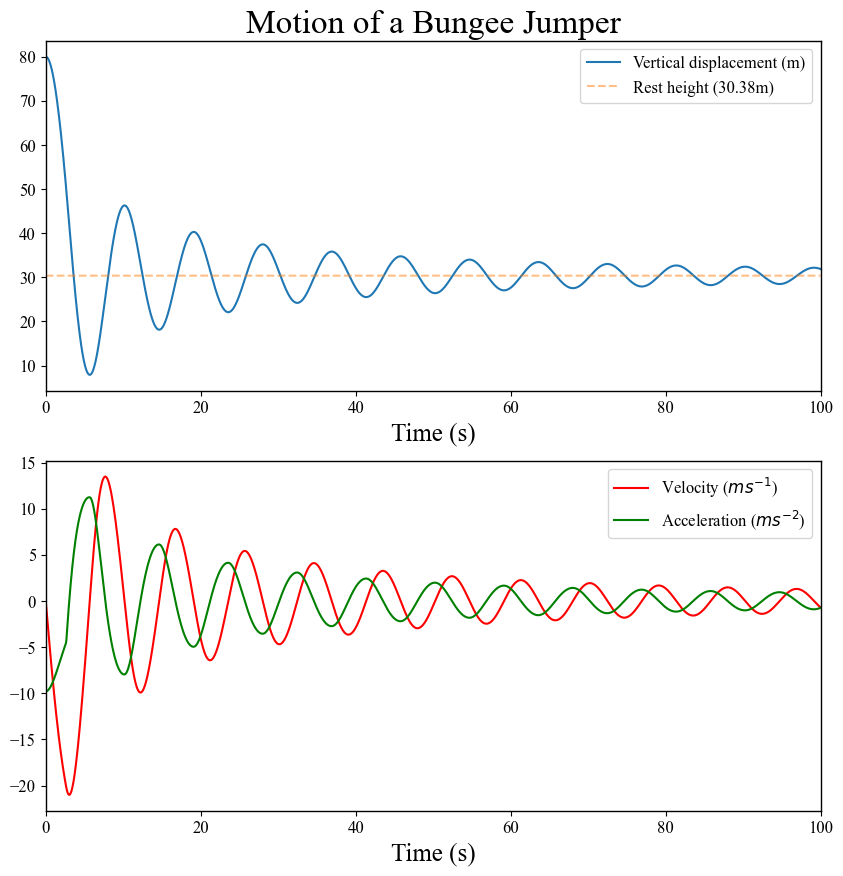

In [7]:
def elas(k,x):
    return k*x

def drag(cl,ct,v):
    return -(cl*v)-(ct*(abs(v))*v)
    
def bungee(t, intial,mass = 80):
    """
    Function defining the bungee ODE.  Signature as specified in scipy.integrate
    """
    y, v = intial #< tuple unpacking.  

    g = -9.81
    m = mass
    k = 40
    l = 30
    y0 = 80
    dy_dt = v


    if y >= 50:
        dv_dt = g  + drag(1,1,v)/m
    elif y < 50 and y > 0:
        dv_dt = g + drag(1,1,v)/m + elas(k,y0-l-y)/m
    # elif y <= 0:                                           #This commented section was an attempt at modelling the case of the bungee jumper hitting the ground at y = 0 but had unexpected effects
    #     dv_dt = elas(k,y0-l-y)
    # elif y>0 :
    #     dv_dt = g + drag(1,1,v)/(m/2) + elas(k,y0-l-y)/(m/2)

    return [dy_dt,dv_dt]

TIME_RANGE = [0,1000]

Y_inintial = 80
V_initial = 0

soln = solve_ivp(bungee, TIME_RANGE, [Y_inintial, V_initial],max_step = 0.05)

soln_times =soln.t
soln_y, soln_v = soln.y
rest = np.full_like(soln_times, soln_y[-1])

acc = []
for i in range(len(soln_times)):
    acceleration = bungee(soln_times, [soln_y[i], soln_v[i]])
    acc.append(acceleration[1])


plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(soln_times, soln_y, label = "Vertical displacement (m)")
plt.plot(soln_times, rest, label = f"Rest height ({rest[0]:.2f}m)",linestyle = "--",alpha = 0.5)
plt.title('Motion of a Bungee Jumper')
plt.xlim(0,100)
plt.xlabel('Time (s)')
plt.legend()
plt.subplot(2,1,2)
plt.plot(soln_times, soln_v, label = "Velocity ($ms^{-1}$)",color = 'red')
plt.plot(soln_times, acc, label = "Acceleration ($ms^{-2}$)",color = 'green')
plt.xlim(0,100)
plt.xlabel('Time (s)')
plt.legend()
plt.show()



From the graphs above it is possible to deduce some conclusion from this particular model of a bungee jump.
The customer never comes into contact with the ground deeming it safe for use of someone with a mass of 80kg, they never have a downwards acceleration greater than $9.81ms^{-1}$ which tells us that there are no unexpected forces acting downwards on teh jumper and they come to rest somewhere below the un-extended height of the cord.

To confirm that the rope used here is suitable for a wider range of jumpers we can use the equations as defined above but for a small range of masses say 60-100kg

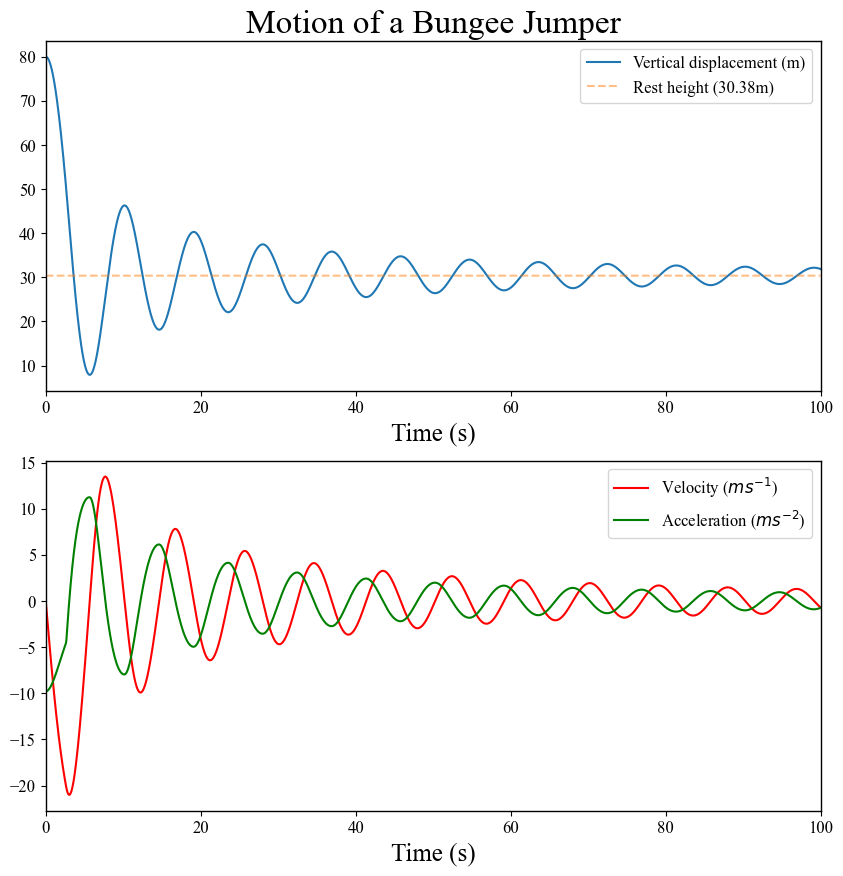

In [8]:

soln = solve_ivp(bungee, TIME_RANGE, [Y_inintial, V_initial], max_step = 0.05)

soln_times =soln.t
soln_y, soln_v = soln.y
rest = np.full_like(soln_times, soln_y[-1])

acc = []
for i in range(len(soln_times)):
    acceleration = bungee(soln_times, [soln_y[i], soln_v[i]])
    acc.append(acceleration[1])


plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(soln_times, soln_y, label = "Vertical displacement (m)")
plt.plot(soln_times, rest, label = f"Rest height ({rest[0]:.2f}m)",linestyle = "--",alpha = 0.5)
plt.title('Motion of a Bungee Jumper')
plt.xlim(0,100)
plt.xlabel('Time (s)')
plt.legend()
plt.subplot(2,1,2)
plt.plot(soln_times, soln_v, label = "Velocity ($ms^{-1}$)",color = 'red')
plt.plot(soln_times, acc, label = "Acceleration ($ms^{-2}$)",color = 'green')
plt.xlim(0,100)
plt.xlabel('Time (s)')
plt.legend()
plt.show()


# End of Task 2